# Oversampling method approach

In [9]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


%matplotlib inline

# data = pd.read_csv("/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_Baseline_Label_Encoding.csv")
# data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed_OneHotEncoding.csv')
# data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_LOOE_FOR_ALL.csv')
data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_WOE_FOR_ALL.csv')
# data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh.csv')


Shape of X: (15420, 23)
Shape of y: (15420, 1)


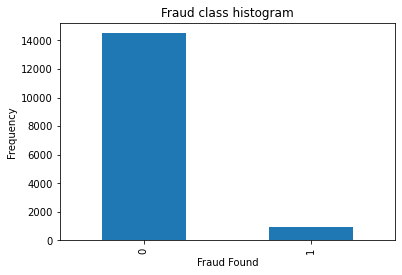

In [10]:
#plotting number of Fraud and non-Fraud
pd.value_counts(data['FraudFound']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Found')
plt.ylabel('Frequency')
data['FraudFound'].value_counts()

X = np.array(data.iloc[:, data.columns != 'FraudFound'])
y = np.array(data.iloc[:, data.columns == 'FraudFound'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number policies X_train dataset: ", X_train.shape)
print("Number policies  y_train dataset: ", y_train.shape)
print("Number policies  X_test dataset: ", X_test.shape)
print("Number policies  y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
# data.columns.size

Number policies X_train dataset:  (10794, 23)
Number policies  y_train dataset:  (10794, 1)
Number policies  X_test dataset:  (4626, 23)
Number policies  y_test dataset:  (4626, 1)
Before UnderSampling, counts of label '1': [638]
Before UnderSampling, counts of label '0': [10156] 



## SMOTE Step

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Plotting the Oversampled data using SMOTE

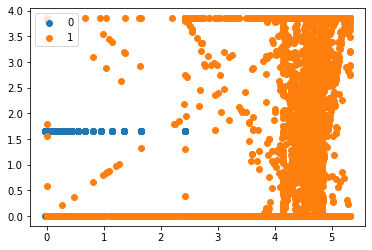

In [13]:
counter = Counter(y_train_res)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_train_res == label)[0]
    plt.scatter(X_train_res[row_ix, 0], X_train_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [14]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After UnderSampling, the shape of train_X: (20312, 23)
After UnderSampling, the shape of train_y: (20312,) 

After UnderSampling, counts of label '1': 10156
After UnderSampling, counts of label '0': 10156


# Creating Gradient Boosting Classifier

In [15]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import GradientBoostingClassifier
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=42)
n_scores = cross_val_score(model, X_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.6f (%.6f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X_train_res, y_train_res)

Accuracy: 0.999970 (0.000218)


GradientBoostingClassifier()

In [16]:
# Predicting the Test set results
y_pred_train = model.predict(X_train_res)
y_pred = model.predict(X_test)

## Confusion matrix plotting function

In [17]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%
Precision metric in the train dataset: 100.0%


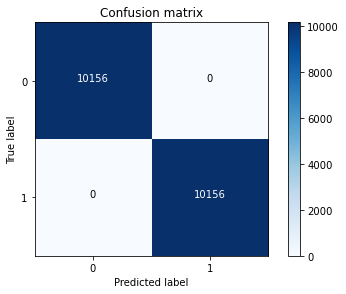

In [18]:
cnf_matrix_tra = confusion_matrix(y_train_res, y_pred_train)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
print("Precision metric in the train dataset: {}%".format(100*cnf_matrix_tra[0,0]/(cnf_matrix_tra[0,0]+cnf_matrix_tra[1,0])))



class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 100.0%
Precision metric in the testing dataset: 100.0%


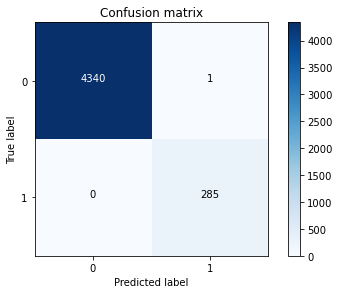

In [19]:

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()